In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [131]:
df = pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [133]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [134]:
df.drop(columns=['Loan_ID'],inplace=True)

In [135]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Categorical Columns :->
- Gender
- Married
- Dependents
- Education
- Self_Employed
- Property_Area

Numerical Columns:->
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History → treat as categorical in analysis, not continuous.

### Which columns have missing values?

In [137]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Percentage missing per column?

In [138]:
(df.isnull().mean()*100).round(2)

Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

### How we Fill these missing values..?

### Now fill categorical columns with mode

In [139]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

### Now fill categorical columns

In [140]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#### Check the missing value got filled or not? 

In [141]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Hence, All Missing/Nan Values got filled

### Check whether column values are:

- Logically correct
- Consistent
- Ready for meaningful EDA

### Check for each Categorical Columns – Unique Values

In [142]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [143]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [144]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [145]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [146]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [147]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

#### Now we fill fix Dependents column because it have (3+) Which is unexpected value

In [148]:
df['Dependents'] = df['Dependents'].replace("3+",3)
df['Dependents'] = df['Dependents'].astype(int)

### Now we Check for each Numerical Columns – Logical Validity

In [149]:
(df['LoanAmount'] <= 0).sum()

np.int64(0)

In [150]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [151]:
df['Credit_History'].unique()

array([1., 0.])

### 5 . Univariate Analysis (ONE COLUMN AT A TIME)

####  -> Target Variable First (Loan_Status)

In [152]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

- 422 loans are approved and 192 rejected

In [153]:
(df['Loan_Status'].value_counts(normalize=True)*100).round(2)

Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64

- hence,The Dataset is Balanced as (68.73% + 31.27%) = 100%

#### Univariate Analysis – Categorical Columns

In [154]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [155]:
(df['Gender'].value_counts(normalize=True) * 100).round(2)

Gender
Male      81.76
Female    18.24
Name: proportion, dtype: float64

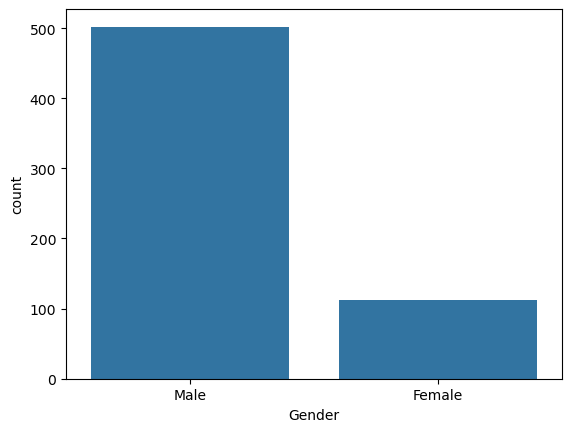

In [156]:
sns.countplot(x='Gender', data=df)
plt.show()

- Majority of loan Applicants are Males (~82%)

##### Note:- EDA is not about maximum plots — it’s about useful insights without noise.

In [157]:
df['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [158]:
(df['Married'].value_counts(normalize=True)*100).round(2)

Married
Yes    65.31
No     34.69
Name: proportion, dtype: float64

- Most of the loan applicants are married (~65%), it shows higher loan demand among married individual

In [159]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [160]:
(df['Education'].value_counts(normalize=True)*100).round(2)

Education
Graduate        78.18
Not Graduate    21.82
Name: proportion, dtype: float64

- Majority of the applicants are Graduated (~78%)
- Graduates applicants dominates the dataset compared to non-graduate

In [161]:
df['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [162]:
(df['Self_Employed'].value_counts(normalize=True)*100).round(2)

Self_Employed
No     86.64
Yes    13.36
Name: proportion, dtype: float64

- Majority of the applicants are not self- amployed

In [163]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [164]:
(df['Property_Area'].value_counts(normalize=True)*100).round(2)

Property_Area
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: proportion, dtype: float64

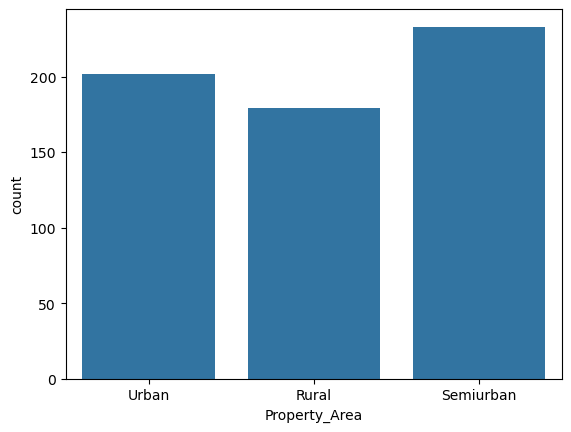

In [165]:
sns.countplot(x='Property_Area', data=df)
plt.show()

- Semiurban properties have highest no of loan applicants

In [166]:
# all done in one shot we can analise in one shot 
cat_cols = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area'
]
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)


Gender
Gender
Male      502
Female    112
Name: count, dtype: int64
Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

Married
Married
Yes    401
No     213
Name: count, dtype: int64
Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

Dependents
Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64
Dependents
0    58.631922
1    16.612378
2    16.449511
3     8.306189
Name: proportion, dtype: float64

Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.

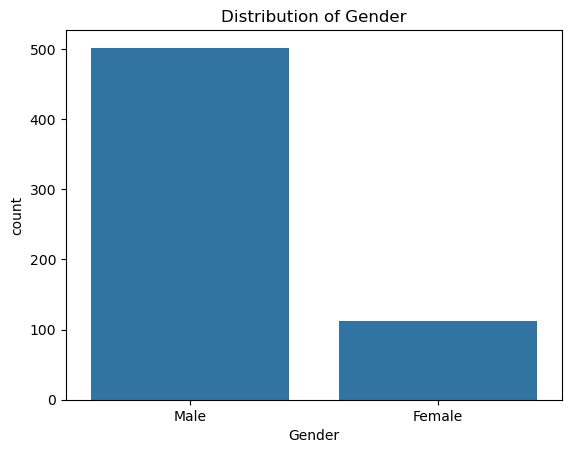

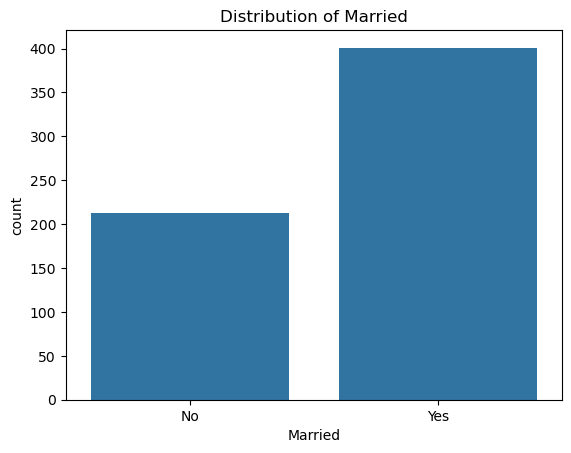

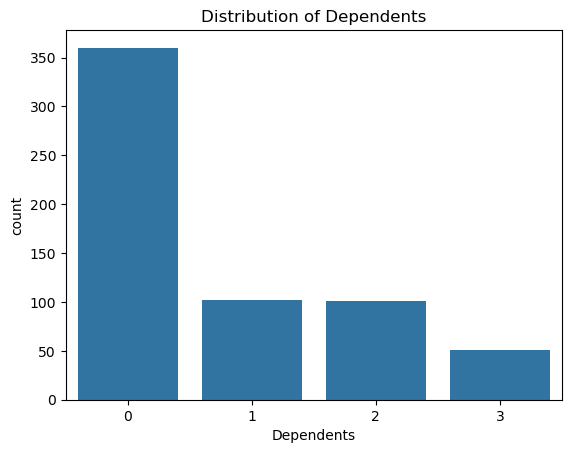

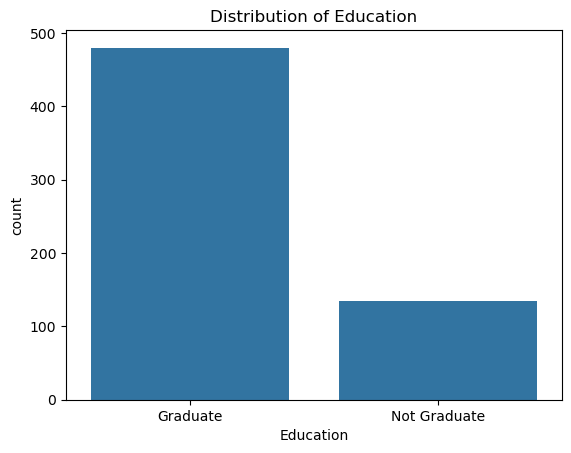

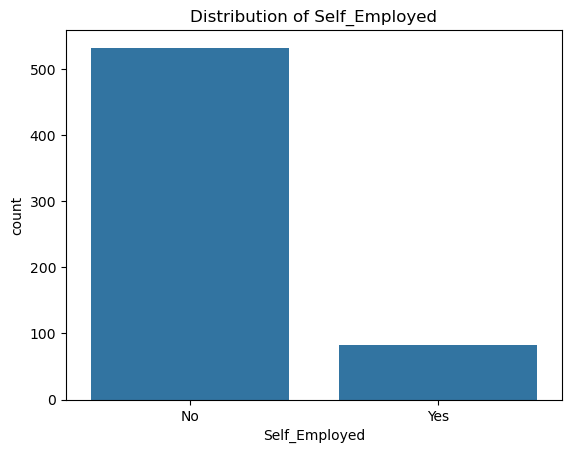

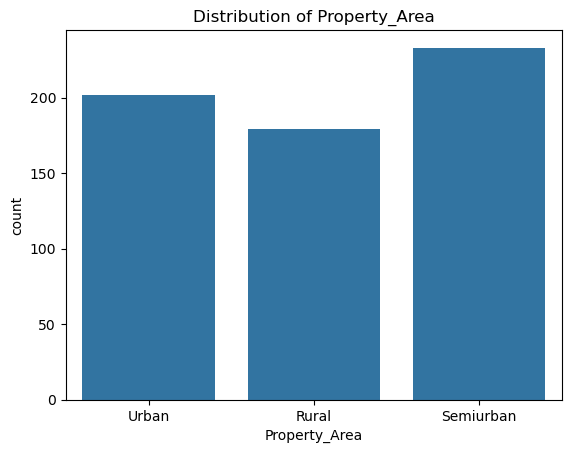

In [167]:
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

##### Note:- EDA is not about maximum plots — it’s about useful insights without noise

### Univariate Analysis – Numerical Columns

In [168]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

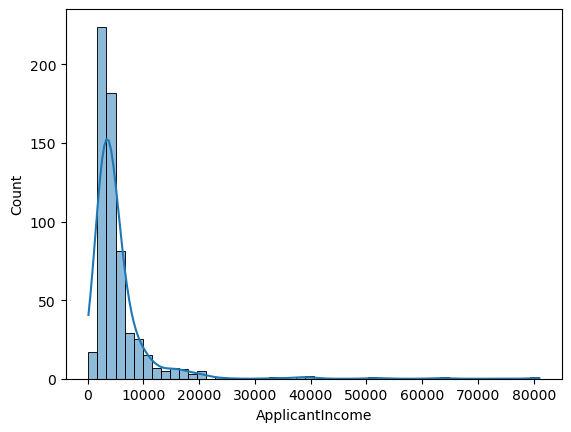

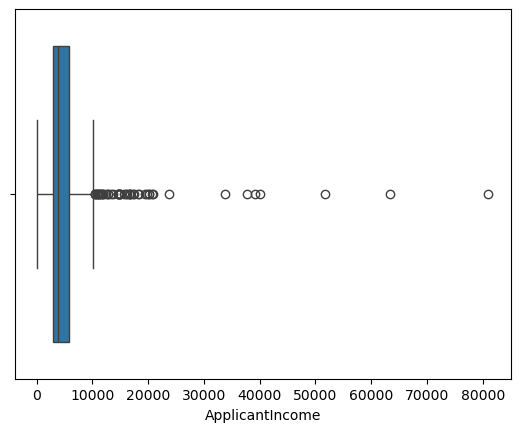

In [169]:
sns.histplot(df['ApplicantIncome'],kde=True)
plt.show()

sns.boxplot(x=df['ApplicantIncome'])
plt.show()

- High Income Outliers are present
- mean > median -->(Right Skewed)
- Applicant Income is right Skewed, with presence of high-income outliers

##### EDA rule (important):  If a plot doesn’t add new understanding, don’t force it.

In [170]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

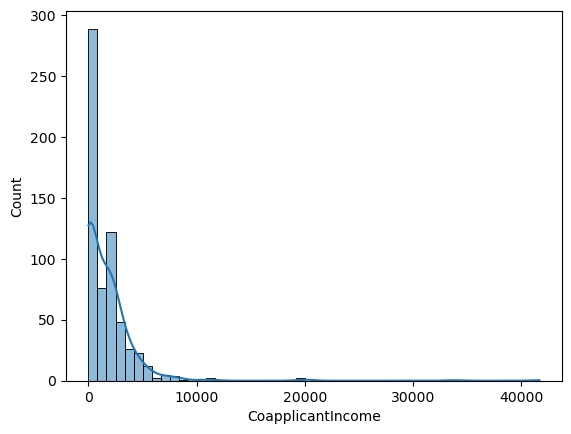

In [171]:
sns.histplot(df['CoapplicantIncome'],kde = True)
plt.show()

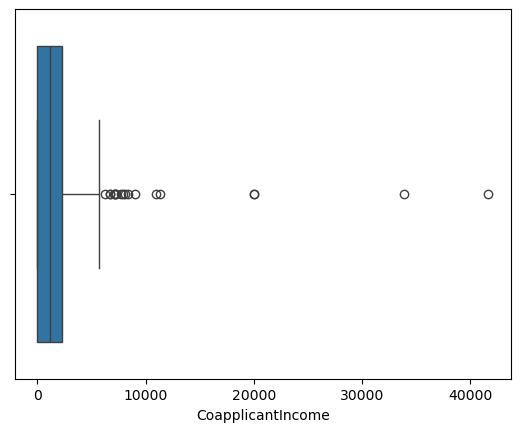

In [172]:
sns.boxplot(x = df['CoapplicantIncome'],data = df)
plt.show()

- Many zero values (no coapplicant)
- Right Skewed distribution
- A large no of applicants do not have coapplicant, that's why Many zero values
- some high income outliers are present -->CoapplicantIncome = 0 means: Either there is no co-applicant OR the co-applicant has no income.

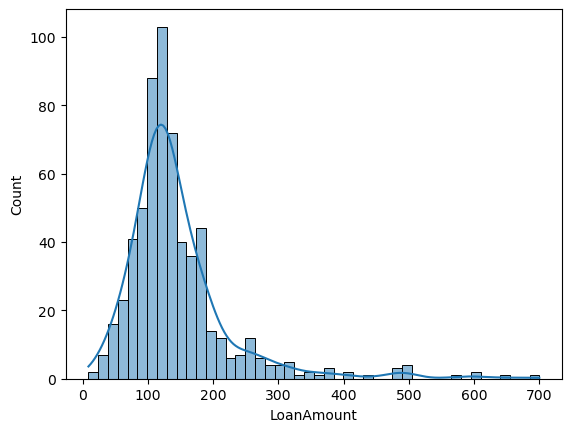

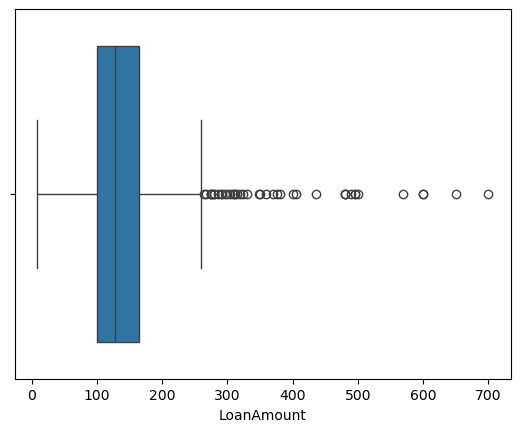

In [173]:
df['LoanAmount'].describe()

sns.histplot(df['LoanAmount'],kde=True)
plt.show()

sns.boxplot(x=df['LoanAmount'])
plt.show()

- Right skewed 
- outliers present 
- loan amount distribution is right skewed with some high-value outliers 

In [174]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

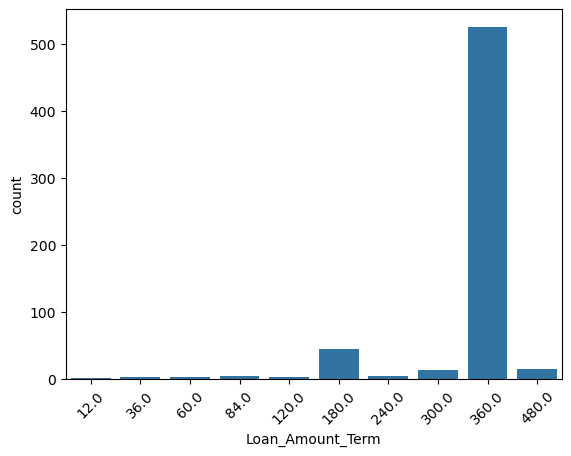

In [175]:
sns.countplot(x = 'Loan_Amount_Term',data=df)
plt.xticks(rotation=45)
plt.show()

- Most of the the loans have a term of 360 Months

In [176]:
df['Dependents'].value_counts().sort_index()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

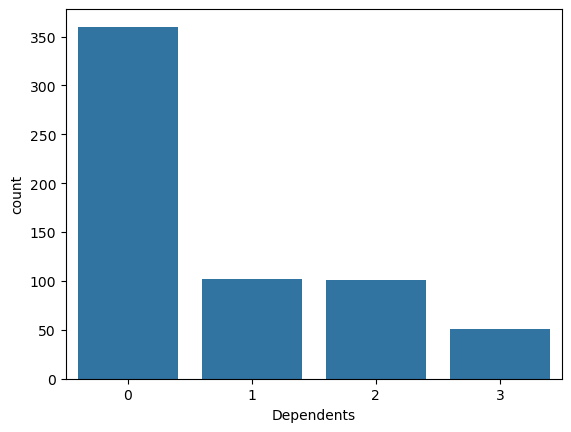

In [177]:
sns.countplot(x=df['Dependents'],data=df)
plt.show()

- Majority of loan applicants have 0 dependents.
- Applicants with 1 dependent form the second largest group.
- Very few applicants have 2 or 3 dependents.
- This distribution indicates that most applicants have lower family financial responsibilities.
- Applicants with higher numbers of dependents are comparatively fewer in the dataset.

### 6: Bivariate Analysis

#### Loan_Status vs Credit_History (MOST IMPORTANT 🔥)

In [178]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100

Loan_Status,N,Y
Credit_History,,
0.0,92.134831,7.865169
1.0,20.952381,79.047619


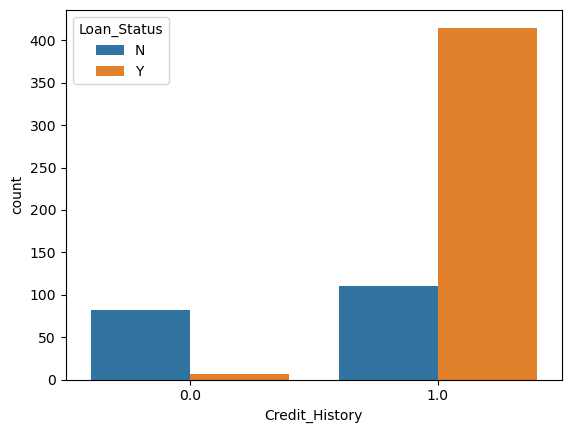

In [179]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.show()

- Applicants with Credit_History = 1 → very high approval rate
- Applicants with Credit_History = 0 → mostly rejected
- Credit history is the strongest factor influencing loan approval
- Applicants with good credit history have significantly higher approval rates

#### Loan_Status vs Education

In [180]:
(pd.crosstab(df['Education'],df['Loan_Status'],normalize='index')*100).round(2)

Loan_Status,N,Y
Education,,
Graduate,29.17,70.83
Not Graduate,38.81,61.19


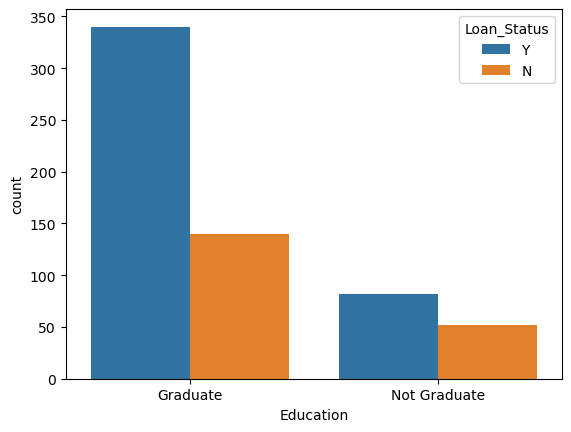

In [181]:
sns.countplot(x ='Education',hue='Loan_Status',data =df)
plt.show()

- Loan approval also depends on Graduate have more loan approval rate 
- non graduate people have less loan approval rate

#### Loan_Status vs Property_Area

In [ ]:
(pd.crosstab(df['Property_Area'], df['Loan_Status'], normalize='index') * 100).round(2)

In [ ]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.show()

- on Semi-Urban property have more loan approval rate.
- Rural areas have comparatively lower approvals

#### Loan_Status vs Dependents

In [ ]:
(pd.crosstab(df['Dependents'], df['Loan_Status'], normalize='index') * 100).round(2)

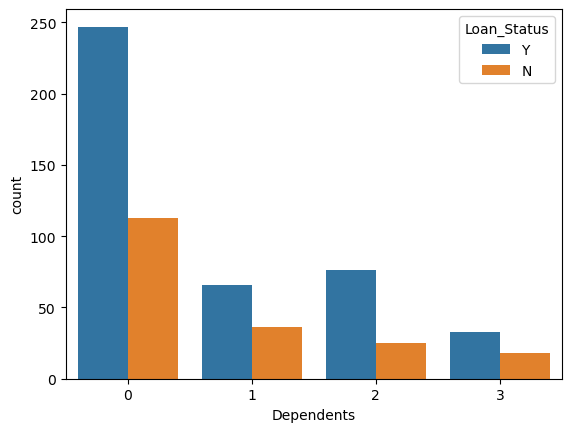

In [185]:
sns.countplot(x = "Dependents",hue = "Loan_Status",data = df)
plt.show()

- Approval rate decreases as number of dependents increases

#### Loan_Status vs ApplicantIncome (Numerical)

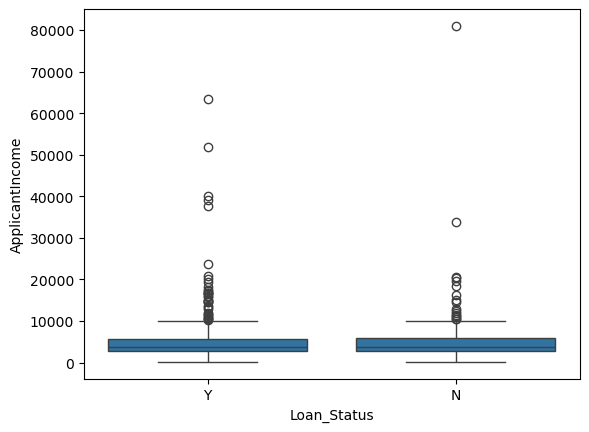

In [183]:
sns.boxplot(x = 'Loan_Status',y = "ApplicantIncome",data=df)
plt.show()

- Approved loan tend to have slightly higher income
- income alone does not gurantee approval

#### Loan_Status vs LoanAmount

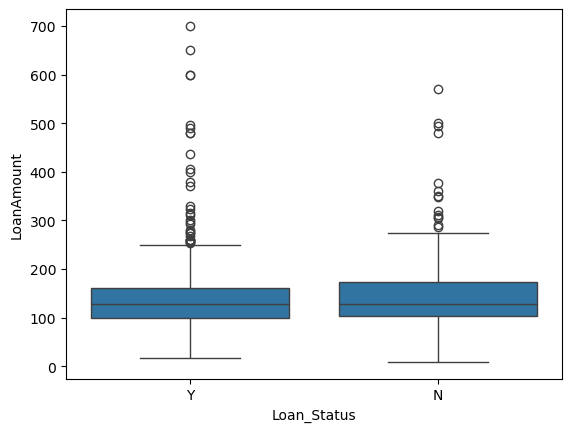

In [184]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

- LoanAmount distributions overlap significantly
- Higher loan amounts do not necessarily mean rejection

#### Note: Credit_History is the most influential feature for loan approval, followed by Property_Area and Education. Income and Dependents have                  comparatively weaker influence.

### 7: Final EDA Summary & Conclusion

1. Loan Approval Distribution

- Majority of loan applications are approved.
- Dataset shows slight class imbalance in favor of approved loans.

2. Credit_History (Most Important Factor)
   
- Applicants with Credit_History = 1 have a very high approval rate.
- Applicants with Credit_History = 0 are mostly rejected.
- Credit history is the strongest predictor of loan approval.

3. Property_Area

- Urban and Semiurban areas show higher loan approval rates.
- Rural areas have comparatively lower approvals.
- Property location has a moderate impact on loan approval.

4. Education

- Graduate applicants have a slightly higher approval rate than non-graduates.
- Education plays a supporting role, not a decisive one.

5. Income (Applicant & Coapplicant)

- ApplicantIncome and CoapplicantIncome are right-skewed.
- Higher income does not guarantee loan approval.
- Income alone is a weak predictor compared to credit history.

6. LoanAmount

- LoanAmount distribution overlaps for approved and rejected loans.
- Larger loan amounts are not necessarily rejected.
- Loan amount has limited influence on approval decision.

7. Dependents

- Most applicants have 0 or 1 dependent.
- Approval rate slightly decreases as dependents increase.
- Dependents have a weak to moderate impact.

### Overall Conclusion